In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import os

exec(open("../header.py").read())

FileNotFoundError: [Errno 2] No such file or directory: '../header.py'

In [ ]:
threshold = 40

In [ ]:
raw_train_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_train_data.csv"))
raw_val_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_val_data.csv"))
raw_test_data = pd.read_csv(processed_root("03-bag-of-words/threshold-"+str(threshold)+"/bow_test_data.csv"))

In [ ]:
raw_train_data.columns

### Import

In [5]:
list(set(raw_train_data['poetry_author'].values))

['John Donne',
 'Rae Armantrout',
 'William Shakespeare',
 'Walt Whitman',
 'Kay Ryan',
 'Emily Dickinson',
 'John Ashbery',
 'Yusef Komunyakaa',
 'William Wordsworth',
 'Alfred, Lord Tennyson',
 'William Butler Yeats',
 'Percy sshe Shelley']

In [6]:
X_train = raw_train_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
X_val = raw_val_data\
    .drop(['poetry_text', 'poetry_author'], axis = 1)
y_train = raw_train_data['poetry_author']
y_val = raw_val_data['poetry_author']

### Model

In [7]:
from sklearn.naive_bayes import BernoulliNB

In [8]:
nb = BernoulliNB(fit_prior = False)

### Train

In [9]:
y_pred = nb.fit(X_train, y_train)

### Evaluate

In [10]:
# Training
y_pred_train = nb.predict(X_train)
train_accuracy = np.mean(y_pred_train == y_train) * 100
print("Training Accuracy: %.2f%%"%(train_accuracy))

# Validation
y_pred_val = nb.predict(X_val)
val_accuracy = np.mean(y_pred_val == y_val) * 100
print("Validation Accuracy: %.2f%%"%(val_accuracy))

Training Accuracy: 55.14%
Validation Accuracy: 33.07%


## Tuning process

In [14]:
def tuning_loop(alpha_choices):
    
    train_accuracies = []
    val_accuracies = []

    for alpha in alpha_choices:
        nb = BernoulliNB(alpha = alpha, fit_prior = False)
        nb.fit(X_train, y_train)
        # Training
        y_pred_train = nb.predict(X_train)
        train_accuracy = np.mean(y_pred_train == y_train) * 100
        train_accuracies.append(train_accuracy)

        # Validation
        y_pred_val = nb.predict(X_val)
        val_accuracy = np.mean(y_pred_val == y_val) * 100
        val_accuracies.append(val_accuracy)
        
    return train_accuracies, val_accuracies

In [15]:
def plot_results(tune_var, train, val):
    fig, ax = plt.subplots()
    ax.plot(tune_var, train, label = "Train")
    ax.plot(tune_var, val, label = "Validation")
    ax.set_title("Random Forest Accuracy versus Max Depth")
    ax.set_xlabel("Max Depth")
    ax.set_ylabel("Accuracy (%)")
    ax.legend()
    
    print("Maximum validation accuracy, %.2f%% found at alpha of %.2f."\
      %(max(val), tune_var[np.argmax(val)]))

## Tune 1

In [16]:
alpha_choices1 = [1,10,100]
t1, v1 = tuning_loop(alpha_choices1)

Maximum validation accuracy, 33.07% found at alpha of 1.00.


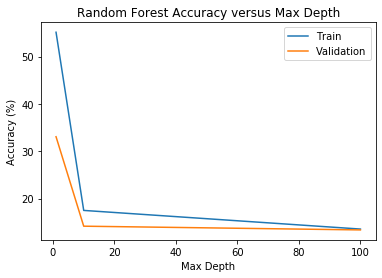

In [17]:
plot_results(alpha_choices1, t1, v1)

## Tune 2

In [18]:
alpha_choices2 = [0.01, 0.1, 1, 5, 10]
t2, v2 = tuning_loop(alpha_choices2)

Maximum validation accuracy, 54.33% found at alpha of 0.10.


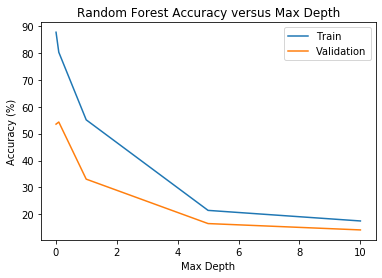

In [19]:
plot_results(alpha_choices2, t2, v2)

## Tune 3

In [20]:
alpha_choices3 = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
t3, v3 = tuning_loop(alpha_choices3)

Maximum validation accuracy, 55.12% found at alpha of 0.05.


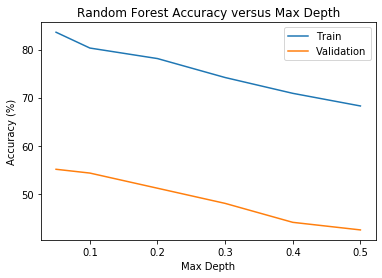

In [21]:
plot_results(alpha_choices3, t3, v3)